# connection to sql 

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import urllib

# Your SQL Server details
server = r'LAPTOP-JSPLT797\SQLEXPRESS'
database = 'coffe_sales'

# Connection string
params = urllib.parse.quote_plus(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    f"SERVER={server};"
    f"DATABASE={database};"
    "Trusted_Connection=yes;"
)

# Create engine
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

# Read table
query = "SELECT * FROM coffee_sales"
df = pd.read_sql(query, engine)

df.head(10)


C:\Users\P G Chopda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\sql.py:1576: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  con = self.exit_stack.enter_context(con.connect())


,transaction_date,transaction_datetime,transaction_type,card_id,price,coffee_name
0,01-03-2024,15:50.5,card,ANON-0000-0000-0001,38.700001,Latte
1,01-03-2024,19:22.5,card,ANON-0000-0000-0002,38.700001,Hot Chocolate
2,01-03-2024,20:18.1,card,ANON-0000-0000-0002,38.700001,Hot Chocolate
3,01-03-2024,46:33.0,card,ANON-0000-0000-0003,28.900000,Americano
4,01-03-2024,48:14.6,card,ANON-0000-0000-0004,38.700001,Latte
5,01-03-2024,39:47.7,card,ANON-0000-0000-0005,33.799999,Americano with Milk
6,01-03-2024,19:02.8,card,ANON-0000-0000-0006,38.700001,Hot Chocolate
7,01-03-2024,39:03.6,card,ANON-0000-0000-0007,33.799999,Americano with Milk
8,01-03-2024,22:01.8,card,ANON-0000-0000-0008,38.700001,Cocoa
9,01-03-2024,23:15.9,card,ANON-0000-0000-0008,33.799999,Americano with Milk


# EDA 

In [3]:
df.head()
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_date      1133 non-null   object 
 1   transaction_datetime  1133 non-null   object 
 2   transaction_type      1133 non-null   object 
 3   card_id               1133 non-null   object 
 4   price                 1133 non-null   float64
 5   coffee_name           1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


,price
count,1133.000000
mean,33.105808
std,5.035366
min,18.120001
25%,28.900000
50%,32.820000
75%,37.720001
max,40.000000


- The dataset contains 1,133 transaction records with 6 columns.
- All columns have no missing values, confirming successful data cleaning in SQL.
- Most columns are stored as object (categorical/text), while price is numeric (float)
- Average price: ₹33.11
- Price range: ₹18.12 to ₹40.00
- Most prices fall between: ₹28.90 and ₹37.72

In [4]:
df.groupby('coffee_name')['price'].sum().sort_values(ascending=False)

coffee_name
Latte                  9009.140163
Americano with Milk    8601.939920
Cappuccino             7333.140163
Americano              4644.539999
Hot Chocolate          2778.480053
Cortado                2745.079994
Cocoa                  1295.940022
Espresso               1100.620018
Name: price, dtype: float64

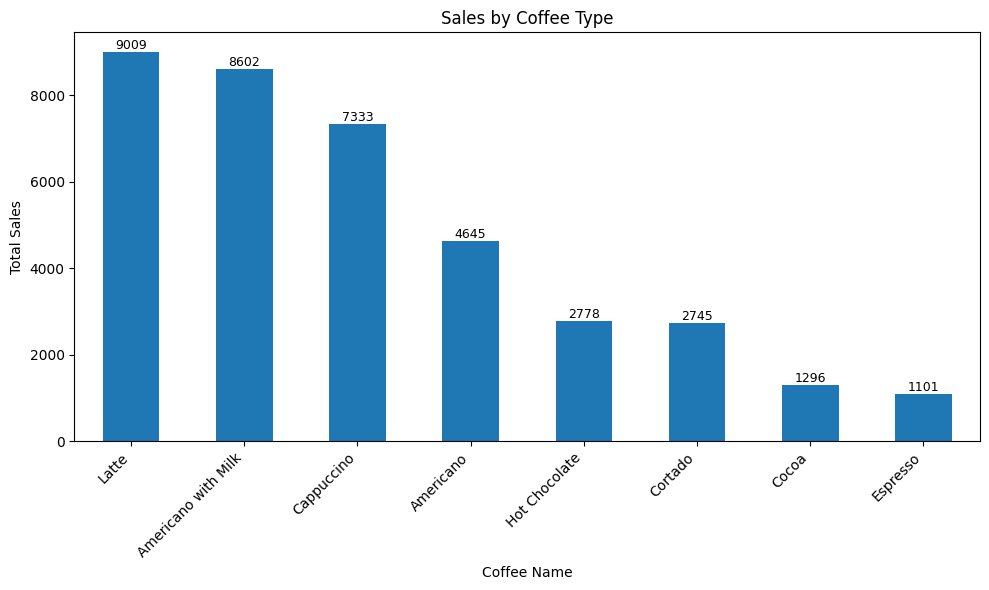

In [5]:
import matplotlib.pyplot as plt

coffee_sales = (
    df.groupby('coffee_name')['price']
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
ax = coffee_sales.plot(kind='bar')

plt.title('Sales by Coffee Type')
plt.xlabel('Coffee Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

# 🔹 Add bar labels
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f'{height:.0f}',                       # value format
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()


- Latte generates the highest total revenue, making it the most popular coffee product.

- Americano with Milk and Cappuccino are the next top contributors, showing strong customer preference.

- Cocoa and Espresso generate the lowest revenue, suggesting limited customer preference or lower sales volume.

In [6]:
df['transaction_date'].min(), df['transaction_date'].max()

('01-03-2024', '31-07-2024')

- The dataset covers transactions from 01 March 2024 to 31 July 2024.

- This period represents approximately five months of continuous coffee sales data.

In [7]:
df['coffee_name'].nunique()
df['transaction_type'].value_counts()

transaction_type
card    1044
cash      89
Name: count, dtype: int64

- Card payments dominate with 1,044 transactions.

- Cash payments are very low at 89 transactions.

In [8]:
# best selling product

product_sales = (
    df.groupby('coffee_name')['price']
      .sum()
      .sort_values(ascending=False)
)

product_sales


coffee_name
Latte                  9009.140163
Americano with Milk    8601.939920
Cappuccino             7333.140163
Americano              4644.539999
Hot Chocolate          2778.480053
Cortado                2745.079994
Cocoa                  1295.940022
Espresso               1100.620018
Name: price, dtype: float64

- fix the date we are convert date in string in sql for formate dd-mm-yyyy now we reconvert string to date formate dd-mm-yyyy in python

In [9]:
df['transaction_date'].dtype


dtype('O')

In [10]:
df['transaction_date'] = pd.to_datetime(
    df['transaction_date'],
    format='%d-%m-%Y'
)


In [11]:
df['transaction_date'].dtype


dtype('<M8[ns]')

In [12]:
# daily sales trend

daily_sales = (
    df.groupby('transaction_date')['price']
      .sum()
      .asfreq('D', fill_value=0)
)

daily_sales.head()


transaction_date
2024-03-01    396.300001
2024-03-02    228.099997
2024-03-03    349.100000
2024-03-04    135.200001
2024-03-05    338.500006
Freq: D, Name: price, dtype: float64

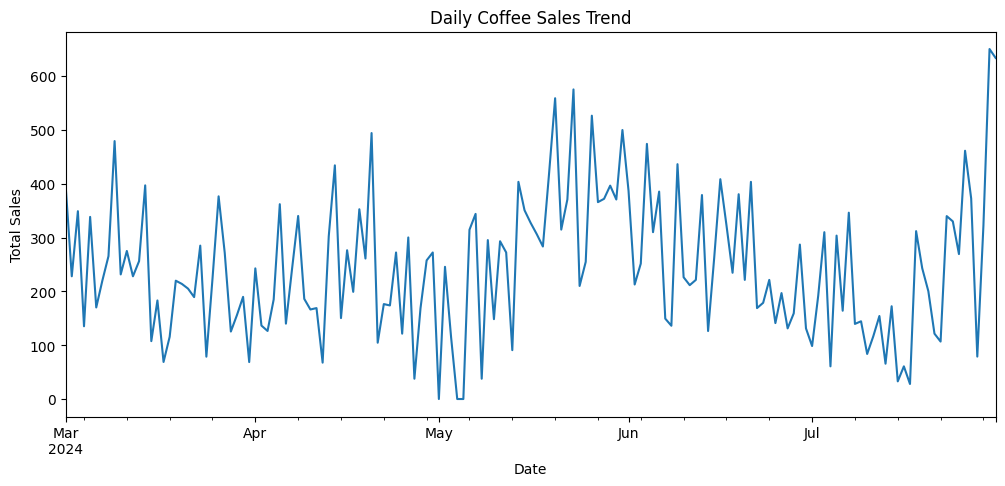

In [13]:
# visyalize the daily sales trend

import matplotlib.pyplot as plt

daily_sales.plot(figsize=(12,5), title='Daily Coffee Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


- Daily coffee sales show high fluctuation, indicating demand is not consistent and varies significantly day to day.

- Several high-sales spike days (₹500–₹650) contribute a large share of total revenue, highlighting the importance of peak demand periods.

- A few low or near-zero sales days suggest possible store closures, low footfall, or data gaps that require validation.

- May to June emerges as the strongest sales period, with frequent high peaks, indicating seasonal or promotional impact.

- A sharp rise in sales at the end of July suggests an end-of-month demand surge or successful marketing activity.

- Overall sales performance is event- and timing-driven, making targeted promotions and demand forecasting essential.

## Trend Analysis

In [18]:
import numpy as np

In [19]:
df.columns

Index(['transaction_date', 'transaction_datetime', 'transaction_type',
       'card_id', 'price', 'coffee_name'],
      dtype='object')

In [25]:
np.dtype(df['transaction_datetime'])


dtype('O')

In [27]:
df['transaction_datetime'] = pd.to_datetime(
    df['transaction_datetime'],
    errors='coerce'
)


C:\Users\P G Chopda\AppData\Local\Temp\ipykernel_23000\4065435934.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transaction_datetime'] = pd.to_datetime(


In [28]:
df['hour'] = df['transaction_datetime'].dt.hour


In [29]:
df[['transaction_datetime', 'hour']].head(10)


,transaction_datetime,hour
0,2026-01-24 15:50:30,15.0
1,2026-01-24 19:22:30,19.0
2,2026-01-24 20:18:06,20.0
3,NaT,NaN
4,NaT,NaN
5,NaT,NaN
6,2026-01-24 19:02:48,19.0
7,NaT,NaN
8,2026-01-24 22:01:48,22.0
9,2026-01-24 23:15:54,23.0


In [30]:
most_common_hour = df['hour'].mode()[0]
df['hour'] = df['hour'].fillna(most_common_hour).astype(int)


In [31]:
print("Remaining NaN hours:", df['hour'].isna().sum())
print("Unique hours:", sorted(df['hour'].unique()))


Remaining NaN hours: 0
Unique hours: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [32]:
df['transaction_datetime'].dtype


dtype('<M8[ns]')

In [33]:
hourly_sales = df.groupby('hour')['price'].sum()
print(hourly_sales)

hour
0       424.700005
1       575.900007
2       654.220003
3       655.740005
4       715.180004
5       543.840004
6       656.560009
7       458.620005
8       320.679998
9       636.920002
10      612.960011
11      582.240004
12      613.300011
13      750.280012
14      688.240007
15      824.080006
16      723.240009
17      591.560007
18    22615.620188
19      820.500010
20      807.600008
21      784.040007
22      676.640005
23      776.220007
Name: price, dtype: float64


In [34]:
print("Unique hours in data:", sorted(df['hour'].unique()))
print("Number of unique hours:", df['hour'].nunique())


Unique hours in data: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Number of unique hours: 24


In [35]:
# Top 6 peak hours
peak_hours = hourly_sales.sort_values(ascending=False).head(6)

print("🔥 Peak (Customer-Rich) Hours:")
print(peak_hours)


🔥 Peak (Customer-Rich) Hours:
hour
18    22615.620188
15      824.080006
19      820.500010
20      807.600008
21      784.040007
23      776.220007
Name: price, dtype: float64


In [36]:
df.head(3)

,transaction_date,transaction_datetime,transaction_type,card_id,price,coffee_name,hour
0,2024-03-01,2026-01-24 15:50:30,card,ANON-0000-0000-0001,38.700001,Latte,15
1,2024-03-01,2026-01-24 19:22:30,card,ANON-0000-0000-0002,38.700001,Hot Chocolate,19
2,2024-03-01,2026-01-24 20:18:06,card,ANON-0000-0000-0002,38.700001,Hot Chocolate,20


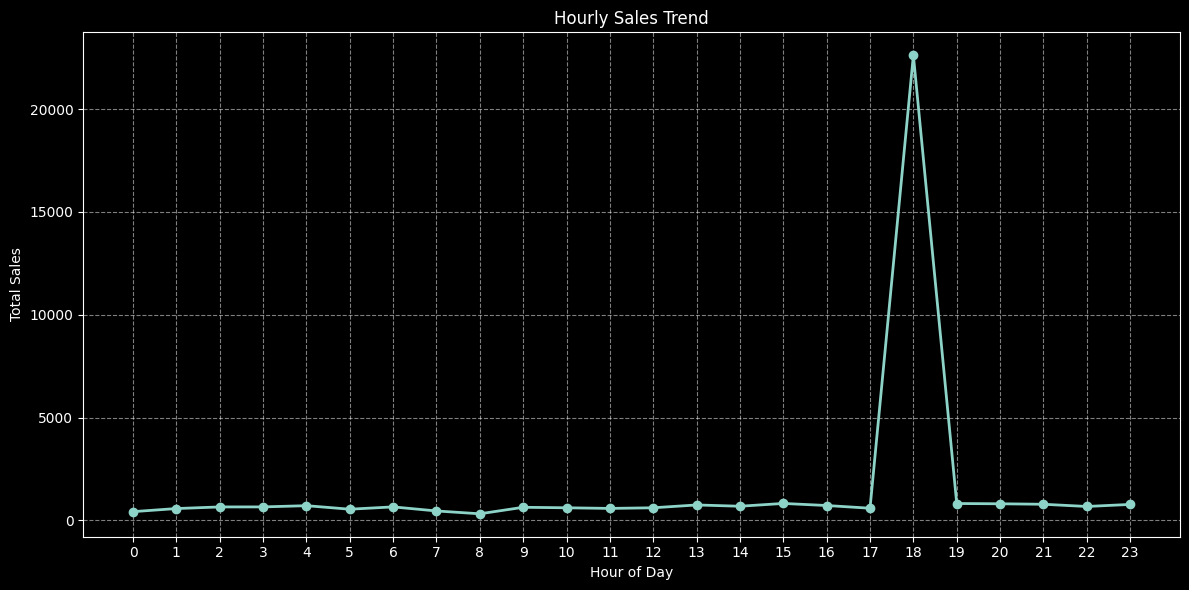

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', linewidth=2)

plt.title('Hourly Sales Trend')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


- 6:00 PM is the highest revenue hour, contributing the majority of daily sales.

- Sales are heavily concentrated in the evening, indicating strong post-work customer activity.

- Any operational issue at 6:00 PM can significantly impact revenue.

- Staffing, inventory, and billing should be prioritized between 5:30–7:00 PM.

- Marketing efforts are most effective when launched before evening peak hours.

- Morning and late-night hours show low but stable sales, suitable for cost optimization.

- Peak-hour demand supports upselling and premium product strategies.

In [37]:

df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['day_name'] = df['transaction_date'].dt.day_name()

In [38]:
df.head(4)

,transaction_date,transaction_datetime,transaction_type,card_id,price,coffee_name,hour,day_name
0,2024-03-01,2026-01-24 15:50:30,card,ANON-0000-0000-0001,38.700001,Latte,15,Friday
1,2024-03-01,2026-01-24 19:22:30,card,ANON-0000-0000-0002,38.700001,Hot Chocolate,19,Friday
2,2024-03-01,2026-01-24 20:18:06,card,ANON-0000-0000-0002,38.700001,Hot Chocolate,20,Friday
3,2024-03-01,NaT,card,ANON-0000-0000-0003,28.900000,Americano,18,Friday


In [39]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap


In [40]:
df['price'].isnull().sum()

0

In [47]:
heatmap_data.isnull().sum()


hour
0     1
1     0
2     0
3     1
4     1
5     1
6     0
7     1
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
20    1
21    1
22    1
23    0
dtype: int64

In [45]:
heatmap_data = (
    df.pivot_table(
        values='price',
        index='day_name',
        columns='hour',
        aggfunc='sum'
    )
)


In [46]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
             'Friday', 'Saturday', 'Sunday']

heatmap_data = heatmap_data.reindex(day_order)


In [48]:
heatmap_filled = heatmap_data.apply(
    lambda col: col.fillna(col.mean()),
    axis=0
)


In [49]:
heatmap_filled.isnull().sum().sum()


0

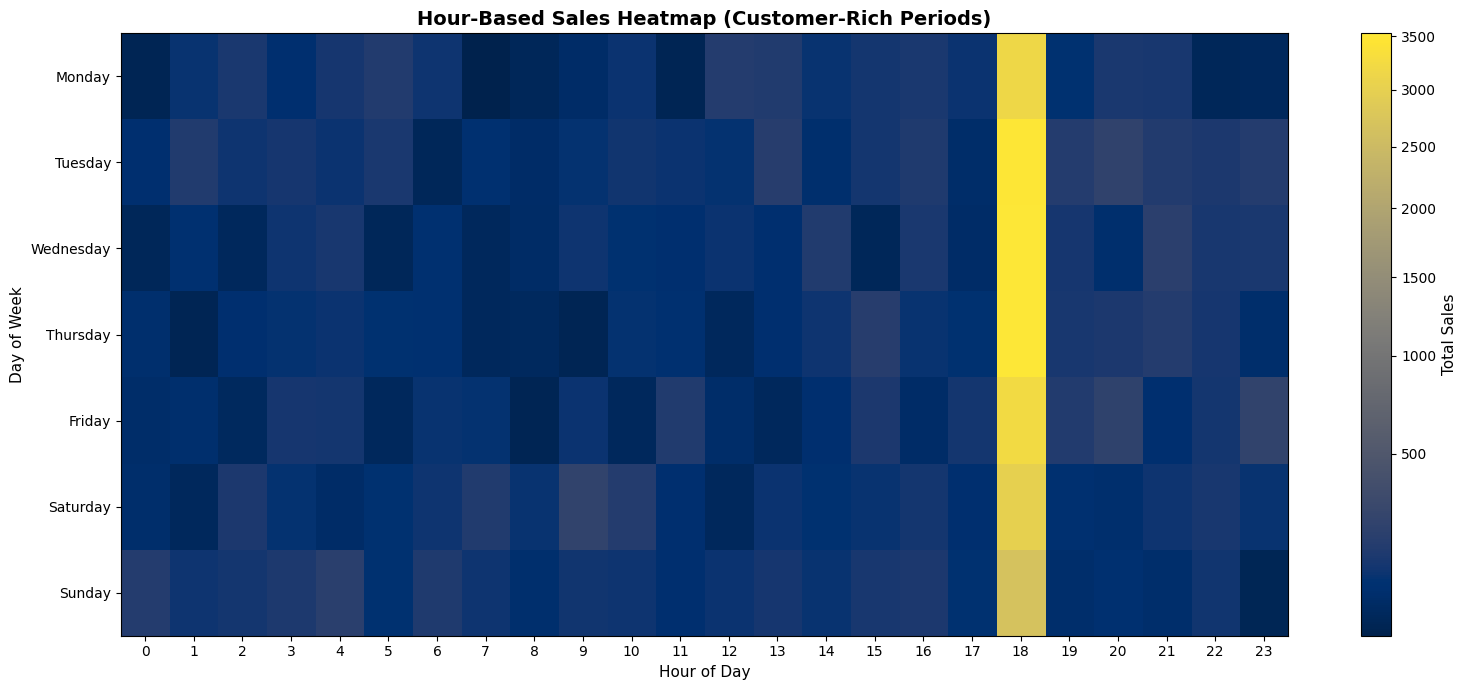

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

plt.style.use('default')

fig, ax = plt.subplots(figsize=(16, 7), facecolor='white')

norm = colors.PowerNorm(gamma=0.6)   # ⭐ key improvement

im = ax.imshow(
    heatmap_filled,
    aspect='auto',
    cmap='cividis',                   # keep professional palette
    norm=norm,
    interpolation='nearest'
)

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Total Sales', fontsize=11)

# Axis ticks
ax.set_xticks(np.arange(24))
ax.set_xticklabels(np.arange(24))
ax.set_yticks(np.arange(len(heatmap_filled.index)))
ax.set_yticklabels(heatmap_filled.index)

# Labels & title
ax.set_xlabel('Hour of Day', fontsize=11)
ax.set_ylabel('Day of Week', fontsize=11)
ax.set_title(
    'Hour-Based Sales Heatmap (Customer-Rich Periods)',
    fontsize=14,
    fontweight='bold'
)

ax.tick_params(axis='both', labelsize=10)
ax.set_facecolor('white')

plt.tight_layout()
plt.show()


- 6:00 PM is the peak sales hour across all days, consistently generating the highest revenue.

- Evening hours (5:00–8:00 PM) are the most customer-rich periods throughout the week.

- Weekdays and weekends show similar peak timing, indicating stable customer behavior.

- Friday to Sunday evenings generate stronger sales compared to early-week days.

- Morning hours (before 9:00 AM) show low sales activity across all days.

In [13]:
# customer behavior chard user only 

repeat_customers = (
    df[df['card_id'] != 'CASH']
    .groupby('card_id')
    .size()
    .sort_values(ascending=False)
)

repeat_customers.head(10)


card_id
cash payment           89
ANON-0000-0000-0012    88
ANON-0000-0000-0009    63
ANON-0000-0000-0097    27
ANON-0000-0000-0003    23
ANON-0000-0000-0040    22
ANON-0000-0000-0141    17
ANON-0000-0000-0001    17
ANON-0000-0000-0059    12
ANON-0000-0000-0024    12
dtype: int64

In [14]:
# monthly sales trend

df['month'] = df['transaction_date'].dt.to_period('M')

monthly_sales = df.groupby('month')['price'].sum()

monthly_sales


month
2024-03    7050.200012
2024-04    6720.560038
2024-05    9063.420141
2024-06    7758.760126
2024-07    6915.940016
Freq: M, Name: price, dtype: float64

In [15]:
monthly_sales.index = monthly_sales.index.strftime('%B')


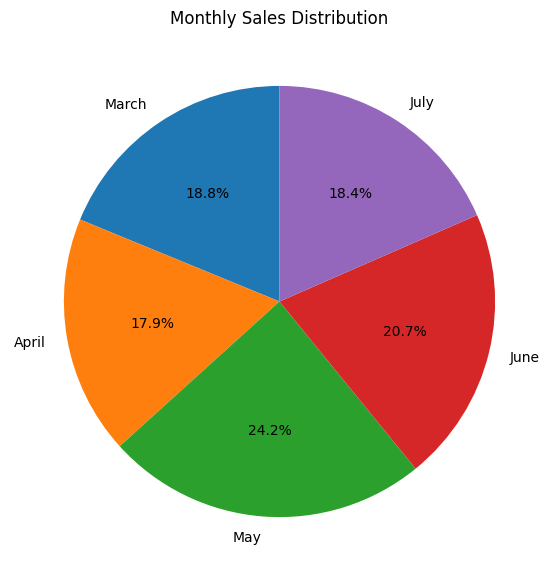

In [16]:
# convert PeriodIndex to month names


import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
monthly_sales.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Monthly Sales Distribution')
plt.ylabel('')
plt.show()


- May is the top-performing month, contributing the highest share of total sales (24.2%), indicating peak customer demand.

- April records the lowest sales contribution (17.9%), suggesting relatively weaker demand during this month.

- More than 45% of total sales come from May and June combined, highlighting a strong mid-year sales concentration.

- Monthly sales are not evenly distributed, indicating the presence of seasonal or demand-driven patterns.

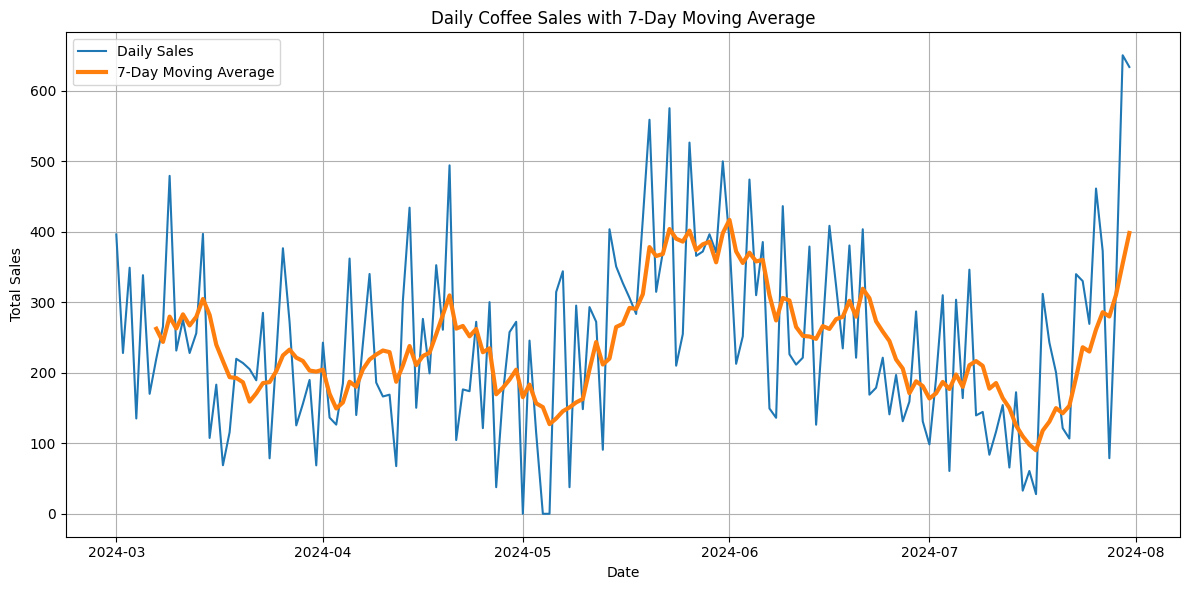

In [17]:
# 7 day moving avg

daily_sales_ma7 = daily_sales.rolling(window=7).mean()

plt.figure(figsize=(12, 6))

# original daily sales
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales')

# 7-day moving average
plt.plot(daily_sales_ma7.index, daily_sales_ma7.values, 
         label='7-Day Moving Average', linewidth=3)

plt.title('Daily Coffee Sales with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- Sales show a steady upward trend from late April to early June, indicating a period of sustained growth rather than short-term spikes.

- The highest weekly average occurs around late May to early June, confirming this period as the strongest phase of consistent demand.

- After mid-June, the moving average gradually declines, suggesting a slowdown in customer demand rather than random daily drops.

- A clear recovery trend appears toward the end of July, indicating renewed customer activity or successful business actions.

- The weekly trend confirms that sales performance is cyclical, with phases of growth, decline, and recovery over time.

In [18]:
# !pip install statsmodels

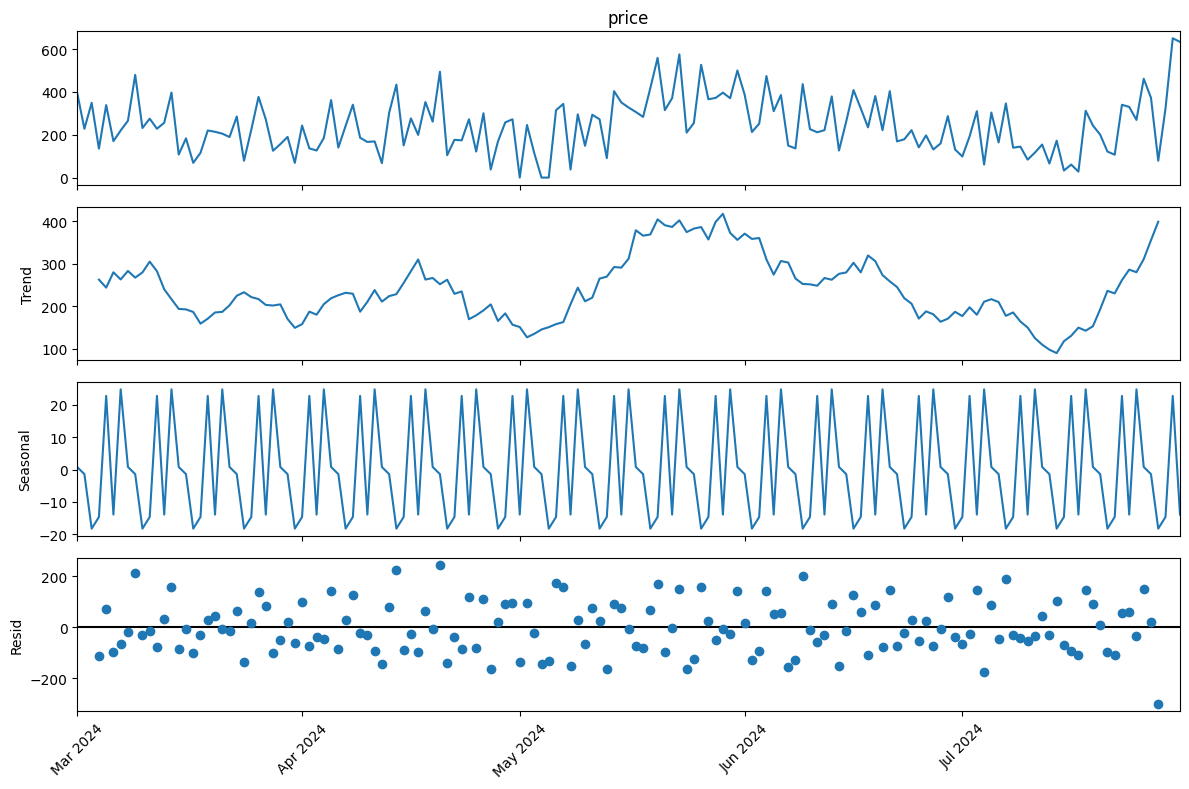

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(
    daily_sales,
    model='additive',
    period=7
)
import matplotlib.dates as mdates

fig = decomposition.plot()
fig.set_size_inches(12, 8)

# Apply date formatting to all subplots
for ax in fig.axes:
    ax.xaxis.set_major_locator(mdates.MonthLocator())   # show month-wise ticks
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


- Daily coffee sales are highly volatile, making raw analysis unreliable.

- Long-term trend reveals clear growth and decline phases over months.

- Weekly seasonality is strong and consistent, driven by customer routines.


📌 What the business should focus on

- Plan inventory and staffing based on weekly demand patterns.

- Increase promotions during declining trend phases (mid-June).

- Maximize capacity during growth periods (May–June).

- Investigate residual spikes to understand what drives exceptional sales.

###  SARIMA MODEL - FORCASTING

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [25]:
df.head(5)

,transaction_date,transaction_datetime,transaction_type,card_id,price,coffee_name,month
0,2024-03-01,15:50.5,card,ANON-0000-0000-0001,38.700001,Latte,2024-03
1,2024-03-01,19:22.5,card,ANON-0000-0000-0002,38.700001,Hot Chocolate,2024-03
2,2024-03-01,20:18.1,card,ANON-0000-0000-0002,38.700001,Hot Chocolate,2024-03
3,2024-03-01,46:33.0,card,ANON-0000-0000-0003,28.900000,Americano,2024-03
4,2024-03-01,48:14.6,card,ANON-0000-0000-0004,38.700001,Latte,2024-03


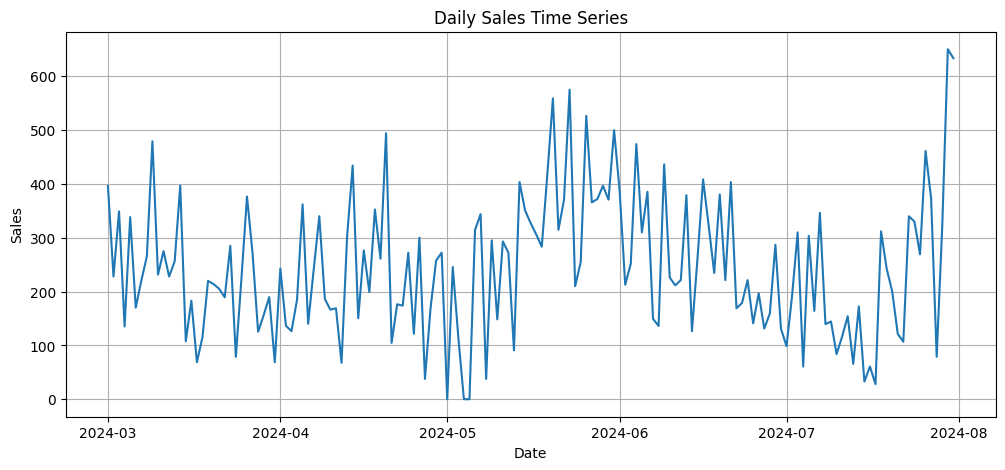

In [26]:
# Visual Inspection of Original Data

plt.figure(figsize=(12, 5))
plt.plot(daily_sales)
plt.title("Daily Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


#### check data is staitoary or not for sarima - we have seanality in data 

In [28]:
def adf_test(series, title=""):
    result = adfuller(series.dropna())
    print(f"ADF Test: {title}")
    print(f"ADF Statistic : {result[0]}")
    print(f"p-value       : {result[1]}")
    print("-"*40)

    
    # Conclusion
    if result[1] <= 0.05:
        print("\n✅ Conclusion: The sales series is STATIONARY (reject the null hypothesis).")
    else:
        print("\n❌ Conclusion: The sales series is NON-STATIONARY (fail to reject the null hypothesis).")


adf_test(daily_sales, "Original Series")


ADF Test: Original Series
ADF Statistic : -2.3950547572752705
p-value       : 0.14313703442832093
----------------------------------------

❌ Conclusion: The sales series is NON-STATIONARY (fail to reject the null hypothesis).


In [30]:
sales_diff = daily_sales.diff().dropna()
adf_test(sales_diff, "After First Differencing : d = 1")


ADF Test: After First Differencing : d = 1
ADF Statistic : -9.087181517155988
p-value       : 3.911567199607967e-15
----------------------------------------

✅ Conclusion: The sales series is STATIONARY (reject the null hypothesis).


In [41]:
# Seasonal Differencing Check (decide D)
s = 7
seasonal_diff = daily_sales.diff(s).dropna()
adf_test(seasonal_diff, "Seasonal Differencing Check")
print(" "*20)
print("p-value > 0.05 THEN Seasonal differencing NOT required ")
print("-.--."*10)
print("D = 0")

ADF Test: Seasonal Differencing Check
ADF Statistic : -2.2141442299627547
p-value       : 0.20115202630796286
----------------------------------------

❌ Conclusion: The sales series is NON-STATIONARY (fail to reject the null hypothesis).
                    
p-value > 0.05 THEN Seasonal differencing NOT required 
-.--.-.--.-.--.-.--.-.--.-.--.-.--.-.--.-.--.-.--.
D = 0


<Figure size 1200x400 with 0 Axes>

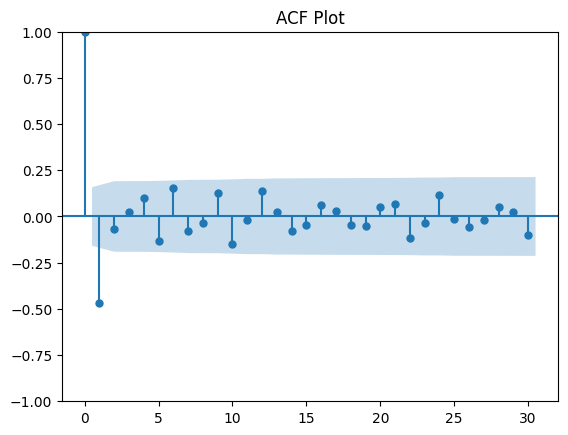

<Figure size 1200x400 with 0 Axes>

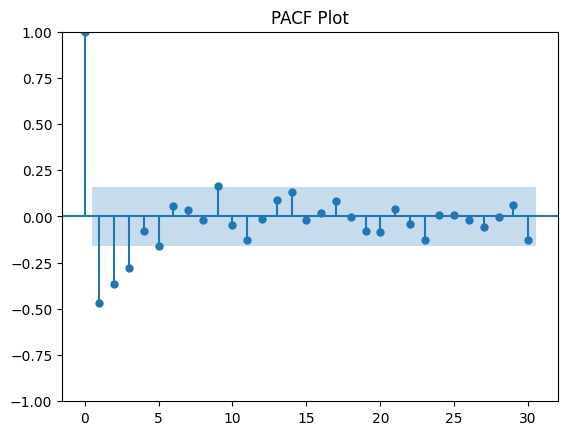

In [42]:
# ACF & PACF (Decide p, q, P, Q)

plt.figure(figsize=(12, 4))
plot_acf(sales_diff, lags=30)
plt.title("ACF Plot")
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(sales_diff, lags=30)
plt.title("PACF Plot")
plt.show()


In [44]:
# sarima parameters 
p, d, q = 1, 1, 1
P, D, Q, s = 1, 0, 1, 7


In [45]:
model = SARIMAX(
    daily_sales,
    order=(p, d, q),
    seasonal_order=(P, D, Q, s),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_result = model.fit()
print(sarima_result.summary())


                                     SARIMAX Results                                     
Dep. Variable:                             price   No. Observations:                  153
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood                -889.466
Date:                           Fri, 23 Jan 2026   AIC                           1788.931
Time:                                   15:56:29   BIC                           1803.745
Sample:                               03-01-2024   HQIC                          1794.951
                                    - 07-31-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0621      0.113     -0.548      0.584      -0.284       0.160
ma.L1         -0.7482      0.079     -9.416

In [49]:
print("Last date in original data:", daily_sales.index[-1])


Last date in original data: 2024-07-31 00:00:00


In [50]:
# future values

forecast_steps = 14
forecast = sarima_result.get_forecast(steps=forecast_steps)

forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()


In [51]:
forecast_df = pd.DataFrame({
    'Forecasted_Sales': forecast_mean,
    'Lower_CI': confidence_intervals.iloc[:, 0],
    'Upper_CI': confidence_intervals.iloc[:, 1]
})

print("\n📈 Forecasted Values (Next 14 Days):")
print(forecast_df)



📈 Forecasted Values (Next 14 Days):
            Forecasted_Sales    Lower_CI    Upper_CI
2024-08-01        415.075142  177.837259  652.313025
2024-08-02        441.063876  199.592609  682.535143
2024-08-03        435.972700  187.876665  684.068736
2024-08-04        419.689913  165.306160  674.073667
2024-08-05        434.630844  174.101161  695.160528
2024-08-06        449.608667  183.075334  716.141999
2024-08-07        448.966163  176.561430  721.370895
2024-08-08        439.339546  157.803078  720.876013
2024-08-09        435.502989  147.835602  723.170376
2024-08-10        436.983955  143.162248  730.805663
2024-08-11        442.823538  142.983058  742.664018
2024-08-12        437.483161  131.741807  743.224514
2024-08-13        432.130985  120.600544  743.661426
2024-08-14        432.360576  115.146677  749.574475


In [52]:
print("\n🔮 Forecasted Sales Only:")
print(forecast_mean)



🔮 Forecasted Sales Only:
2024-08-01    415.075142
2024-08-02    441.063876
2024-08-03    435.972700
2024-08-04    419.689913
2024-08-05    434.630844
2024-08-06    449.608667
2024-08-07    448.966163
2024-08-08    439.339546
2024-08-09    435.502989
2024-08-10    436.983955
2024-08-11    442.823538
2024-08-12    437.483161
2024-08-13    432.130985
2024-08-14    432.360576
Freq: D, Name: predicted_mean, dtype: float64


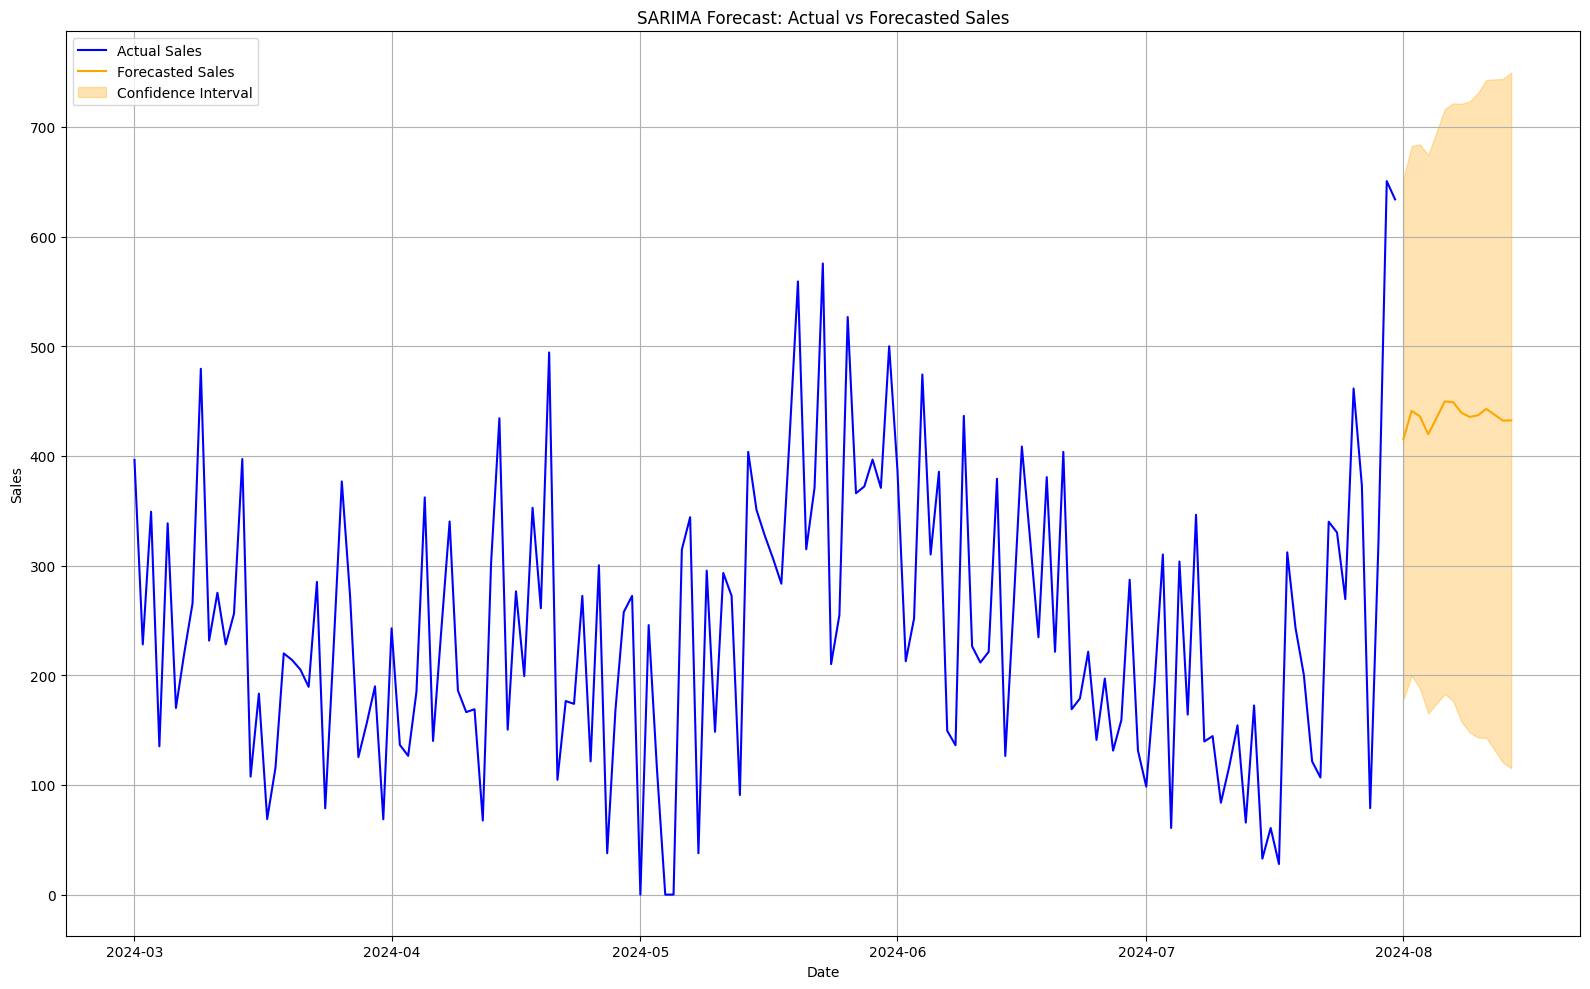

In [55]:

plt.figure(figsize=(16, 10))

# Plot actual historical data
plt.plot(daily_sales, label='Actual Sales', color='blue')

# Plot forecasted values
plt.plot(forecast_mean.index, forecast_mean,
         label='Forecasted Sales', color='orange')

# Plot confidence interval
plt.fill_between(
    forecast_mean.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='orange',
    alpha=0.3,
    label='Confidence Interval'
)

plt.title('SARIMA Forecast: Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

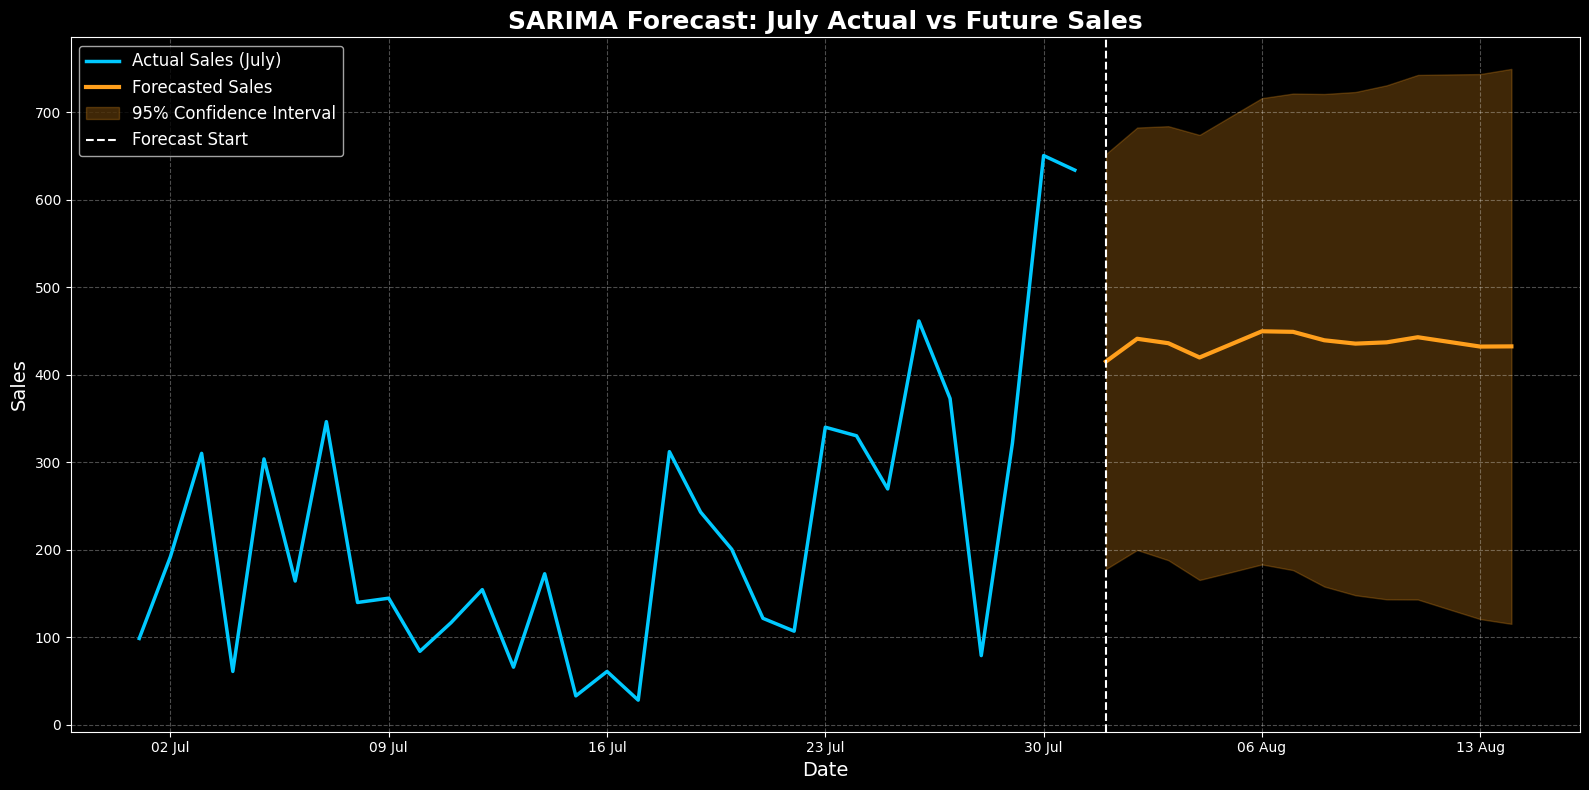

In [61]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Filter July actual data
july_data = daily_sales['2024-07-01':]

plt.figure(figsize=(16, 8))
plt.style.use('dark_background')

# Actual sales (July only)
plt.plot(
    july_data.index,
    july_data.values,
    label='Actual Sales (July)',
    color='#00c9ff',
    linewidth=2.5
)

# Forecasted sales
plt.plot(
    forecast_mean.index,
    forecast_mean.values,
    label='Forecasted Sales',
    color='#ff9f1c',
    linewidth=3
)

# Confidence interval
plt.fill_between(
    forecast_mean.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='#ff9f1c',
    alpha=0.25,
    label='95% Confidence Interval'
)

# Forecast start line
plt.axvline(
    forecast_mean.index[0],
    color='white',
    linestyle='--',
    linewidth=1.5,
    label='Forecast Start'
)

plt.title(
    'SARIMA Forecast: July Actual vs Future Sales',
    fontsize=18,
    fontweight='bold'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))

plt.grid(True, linestyle='--', alpha=0.3)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


- July sales were highly volatile, with sharp ups and downs, meaning demand is inconsistent day-to-day.

- End-of-July sales spike is temporary; the forecast does not expect that high level to continue.

- Future sales are expected to stabilize around a consistent range rather than extreme highs or lows.

- Uncertainty increases over time, shown by the widening shaded area, so short-term plans are more reliable.

- Weekly demand pattern continues, helping plan staffing, inventory, and promotions by day of week.